### Exemplo prático de clusterização de usuários + nayve bayes


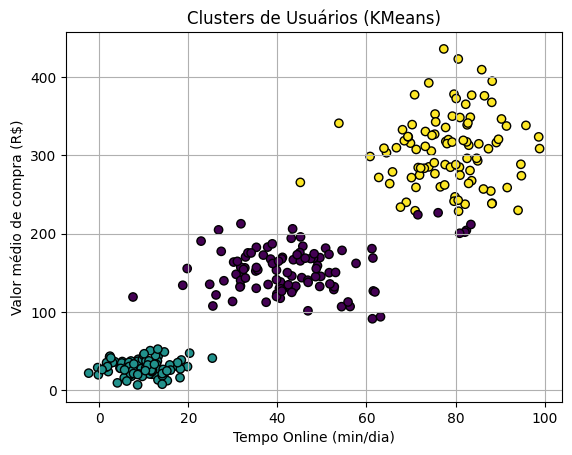

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Geração de dados artificiais
#[tempo online, valor médio de compra]

np.random.seed(42)

vip = np.random.normal(loc=[80, 300], scale=[10, 50], size=(100, 2))
moderado = np.random.normal(loc=[40, 150], scale=[10, 30], size=(100, 2))
inativo = np.random.normal(loc=[10, 30], scale=[5,10], size=(100, 2))

usuarios = np.vstack((vip, moderado, inativo))

#Aplicando KMeans para clusterização

kmeans = KMeans(n_clusters=3, random_state=42)
grupos = kmeans.fit_predict(usuarios)

#Visualização gráfica dos grupos encontrados
plt.scatter(usuarios[:, 0], usuarios[:,1], c=grupos, cmap='viridis', edgecolor='k')
plt.xlabel("Tempo Online (min/dia)")
plt.ylabel("Valor médio de compra (R$)")
plt.title("Clusters de Usuários (KMeans)")
plt.grid(True)
plt.show()

In [2]:
#Treinando classificador Naive Bayes usando os clusters como rótulos

X_train, X_test, y_train, y_test = train_test_split(usuarios, grupos, test_size=0.3, random_state=42)

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
acuracia = modelo_nb.score(X_test, y_test)

print(f"Acurácia do Naive Bayes em classificar os grupos: {acuracia: .2f}")

Acurácia do Naive Bayes em classificar os grupos:  0.98
